## Dataset #2: Phishing Dataset for Machine Learning
(https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning)

**Described feature:**
* **id**: Unique identifier for each URL or record.
* **NumDots**: Number of dots ('.') present in the URL.
* **SubdomainLevel**: The level of the subdomain in the URL (e.g., number of subdomains).
* **PathLevel**: Number of directory levels in the URL path.
* **UrlLength**: Total length of the URL.
* **NumDash**: Number of dashes ('-') in the URL.
* **NumDashInHostname**: Number of dashes in the hostname part of the URL.
* **AtSymbol**: Presence of '@' symbol in the URL.
* **TildeSymbol**: Presence of tilde ('~') symbol in the URL.
* **NumUnderscore**: Number of underscores ('_') in the URL.
* **NumPercent**: Number of percent ('%') symbols in the URL.
* **NumQueryComponents**: Number of components (parameters) in the query string of the URL.
* **NumAmpersand**: Number of ampersands ('&') in the URL.
* **NumHash**: Number of hash ('#') symbols in the URL.
* **NumNumericChars**: Number of numeric characters in the URL.
* **NoHttps**: Indicator if 'https' is not present in the URL.
* **RandomString**: Presence of random strings in the URL.
* **IpAddress**: Whether the URL includes an IP address instead of a domain name.
* **DomainInSubdomains**: Whether the main domain name appears in the subdomains.
* **DomainInPaths**: Whether the main domain name appears in the path section of the URL.
* **HttpsInHostname**: Whether 'https' appears in the hostname part of the URL.
* **HostnameLength**: Length of the hostname in the URL.
* **PathLength**: Length of the path in the URL.
* **QueryLength**: Length of the query string in the URL.
* **DoubleSlashInPath**: Presence of double slash ('//') in the path of the URL.
* **NumSensitiveWords**: Number of sensitive words in the URL (like "secure", "account", etc.).
* **EmbeddedBrandName**: Presence of a well-known brand name in the URL.
* **PctExtHyperlinks**: Percentage of hyperlinks that lead to external sites.
* **PctExtResourceUrls**: Percentage of resource URLs that are external.
* **ExtFavicon**: Whether the favicon linked from the site is external.
* **InsecureForms**: Presence of forms in the website that are not secure.
* **RelativeFormAction**: Use of relative URLs in form actions.
* **ExtFormAction**: Whether form actions point to external URLs.
* **AbnormalFormAction**: Form actions that are abnormal or unexpected.
* **PctNullSelfRedirectHyperlinks**: Percentage of hyperlinks that redirect to null or use 'javascript:void(0)'.
* **FrequentDomainNameMismatch**: Frequency of domain name mismatch, indicating phishing.
* **FakeLinkInStatusBar**: Presence of JavaScript making fake links appear in the status bar.
* **RightClickDisabled**: Whether the right-click function has been disabled on the page (common in phishing to prevent copying URLs).
* **PopUpWindow**: Use of pop-up windows that might hide the address bar or display additional information.
* **SubmitInfoToEmail**: Whether the form data is submitted to an email address (unusual behavior).
* **IframeOrFrame**: Use of iframes or frames, potentially hiding the true destination of links.
* **MissingTitle**: Whether the HTML title tag is missing.
* **ImagesOnlyInForm**: Forms that only contain images, potentially obscuring their true function.
* **SubdomainLevelRT**: Real-time computation of subdomain level.
* **UrlLengthRT**: Real-time computation of URL length.
* **PctExtResourceUrlsRT**: Real-time percentage of external resource URLs.
* **AbnormalExtFormActionR**: Real-time detection of abnormal external form actions.
* **ExtMetaScriptLinkRT**: Real-time detection of external meta or script links.
* **PctExtNullSelfRedirectHyperlinksRT**: Real-time percentage of null or self-redirecting hyperlinks.
* **CLASS_LABEL**: Label indicating whether the URL is phishing or legitimate.


### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

### Reading dataset

In [3]:
phishing_dataset = pd.read_csv('../data/dataset_2.csv')
phishing_dataset.columns = phishing_dataset.columns.str.lower()
phishing_dataset.head()

,id,numdots,subdomainlevel,pathlevel,urllength,numdash,numdashinhostname,atsymbol,tildesymbol,numunderscore,...,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt,class_label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
phishing_dataset.shape

(10000, 50)

### Dataset analysis

In [5]:
phishing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   numdots                             10000 non-null  int64  
 2   subdomainlevel                      10000 non-null  int64  
 3   pathlevel                           10000 non-null  int64  
 4   urllength                           10000 non-null  int64  
 5   numdash                             10000 non-null  int64  
 6   numdashinhostname                   10000 non-null  int64  
 7   atsymbol                            10000 non-null  int64  
 8   tildesymbol                         10000 non-null  int64  
 9   numunderscore                       10000 non-null  int64  
 10  numpercent                          10000 non-null  int64  
 11  numquerycomponents                  10000 

In [6]:
phishing_dataset.isnull().sum()

id                                    0
numdots                               0
subdomainlevel                        0
pathlevel                             0
urllength                             0
numdash                               0
numdashinhostname                     0
atsymbol                              0
tildesymbol                           0
numunderscore                         0
numpercent                            0
numquerycomponents                    0
numampersand                          0
numhash                               0
numnumericchars                       0
nohttps                               0
randomstring                          0
ipaddress                             0
domaininsubdomains                    0
domaininpaths                         0
httpsinhostname                       0
hostnamelength                        0
pathlength                            0
querylength                           0
doubleslashinpath                     0


### Data cleaning

In [8]:
phishing_dataset.shape

(10000, 50)

### Data visualisation

In [9]:
phishing_dataset.describe()

,id,numdots,subdomainlevel,pathlevel,urllength,numdash,numdashinhostname,atsymbol,tildesymbol,numunderscore,...,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt,class_label
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='class_label'>

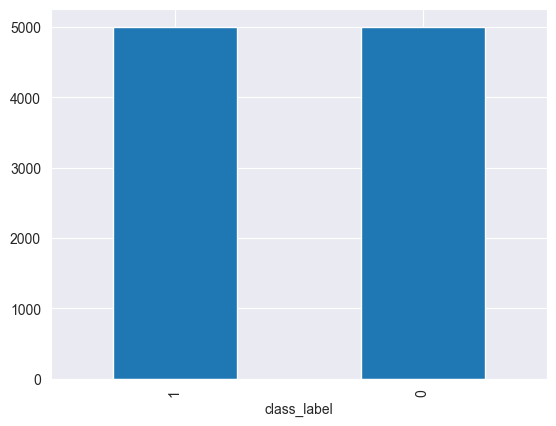

In [11]:
phishing_dataset['class_label'].value_counts().plot(kind='bar')

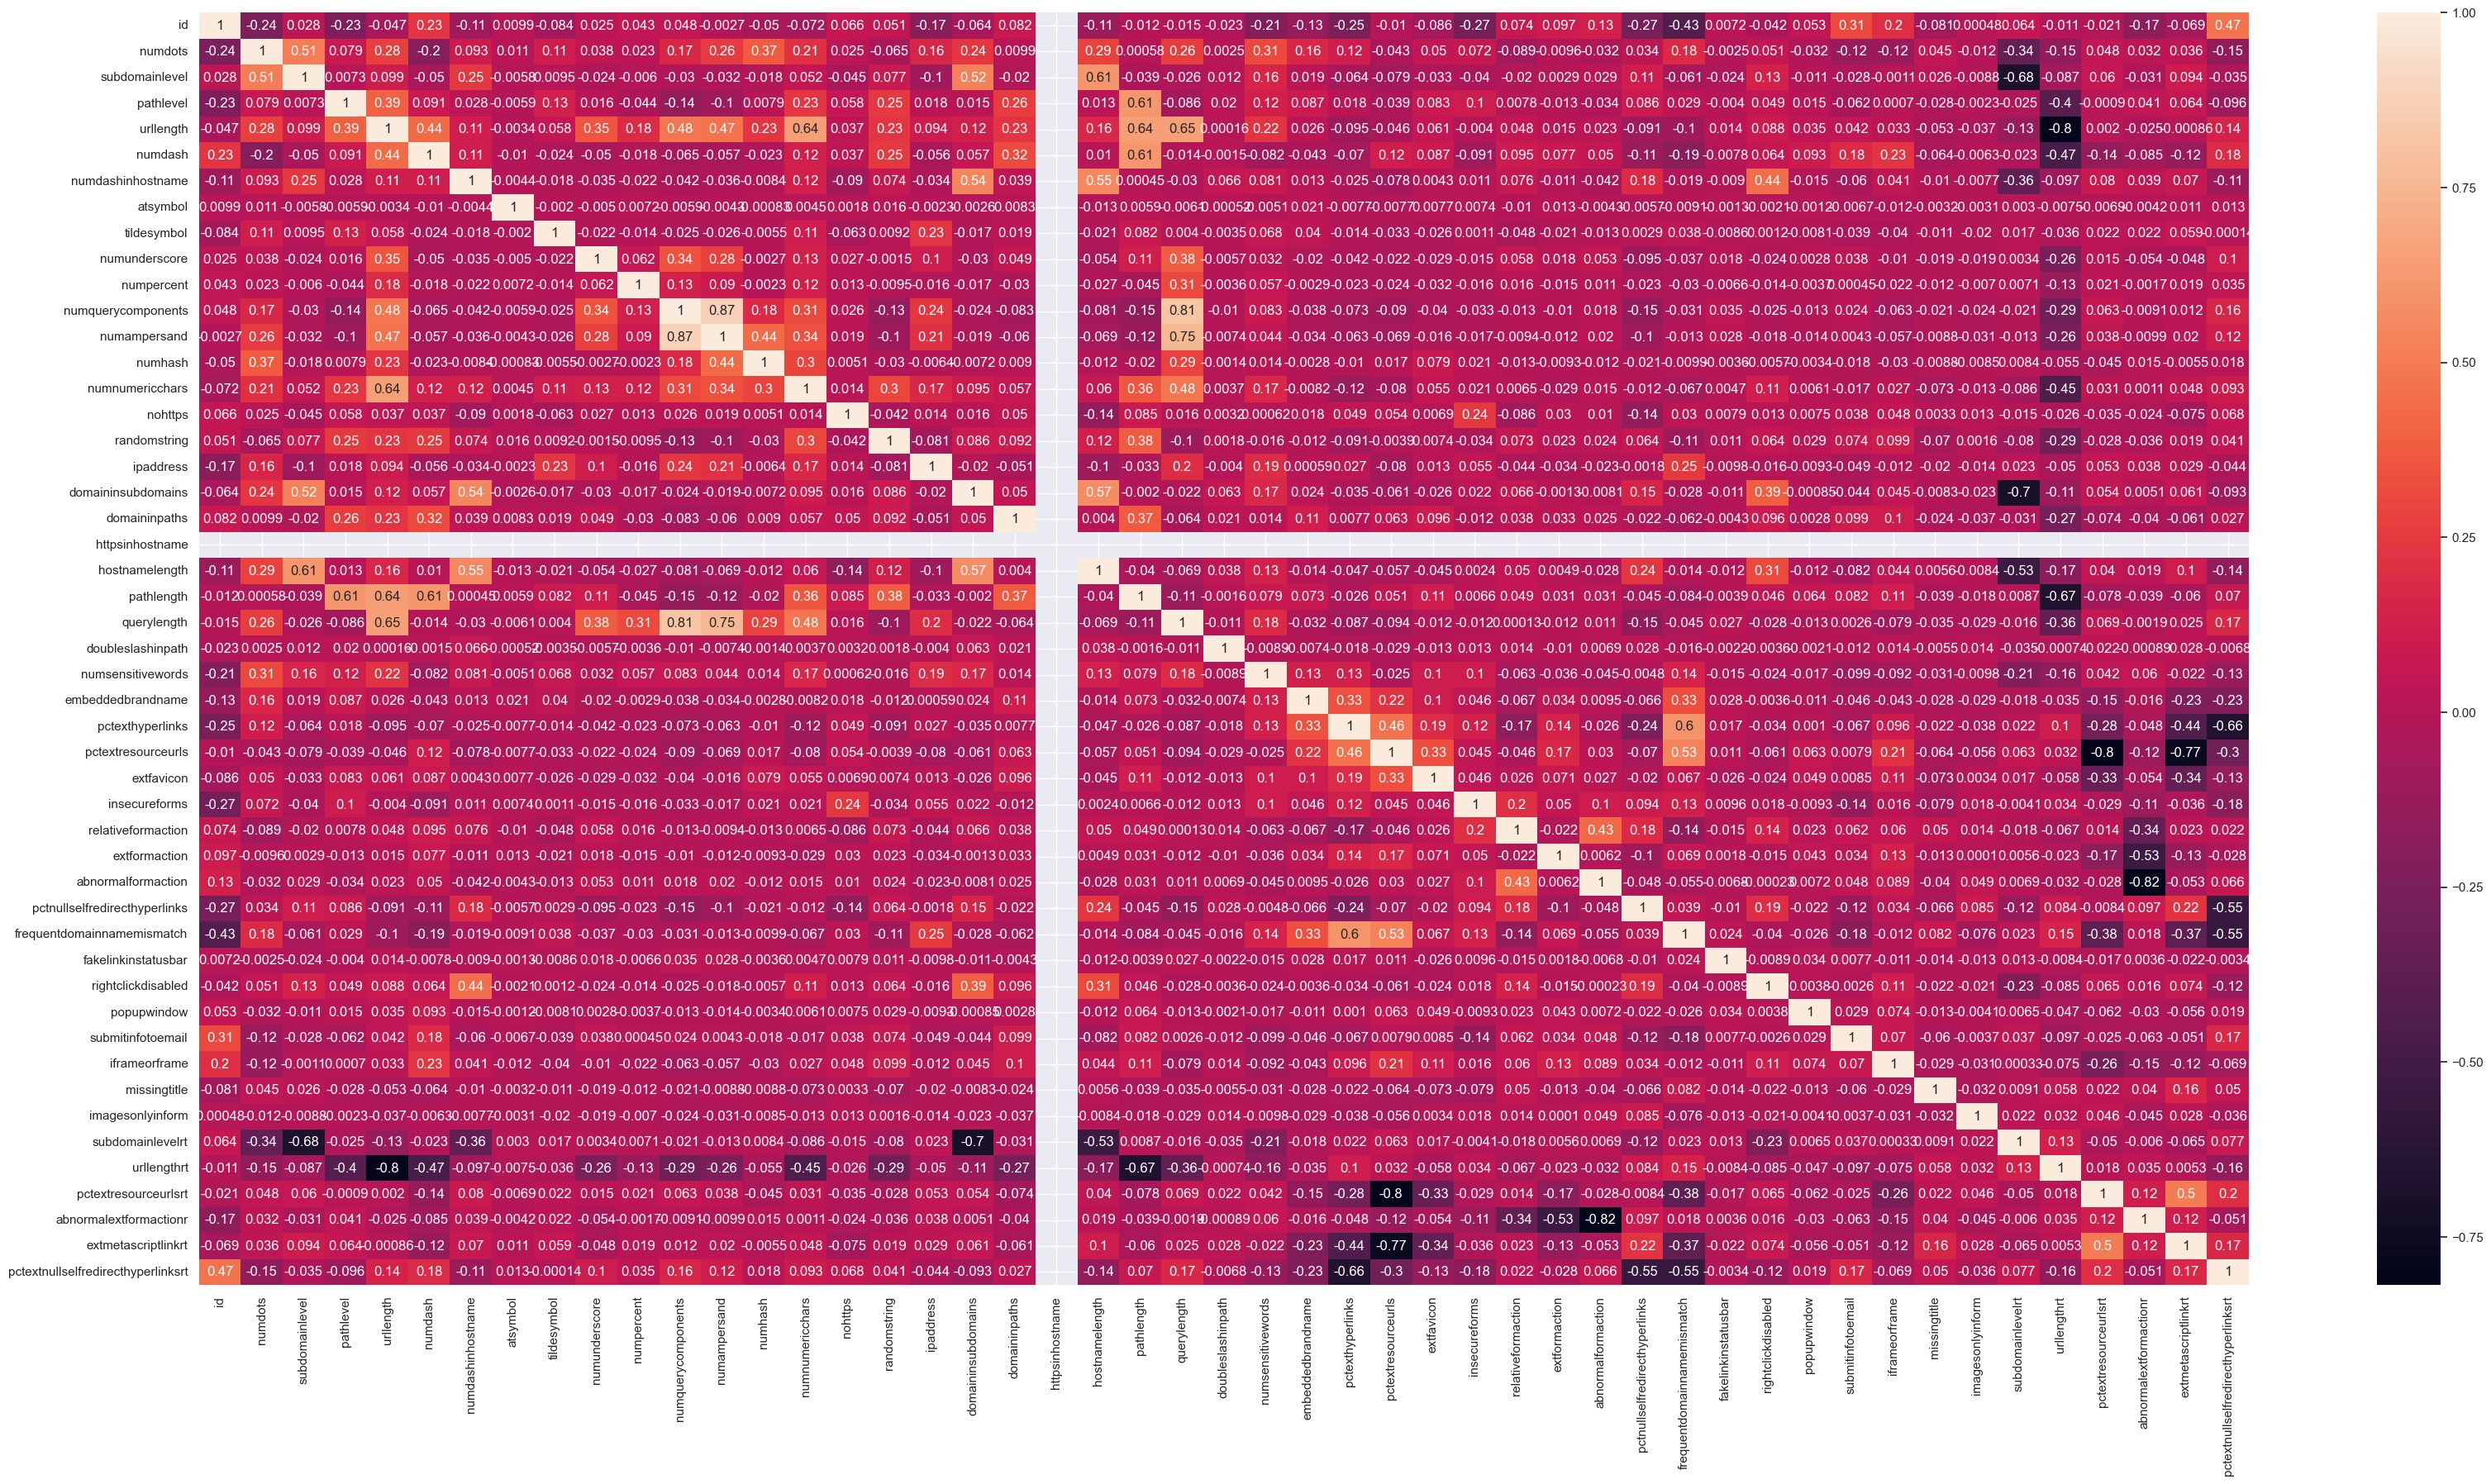

In [14]:
malicious_data_numeric = phishing_dataset.select_dtypes(['number']) 
sns.set(rc={'figure.figsize': (40, 20)})
sns.heatmap(malicious_data_numeric.iloc[:, :-1].corr(), annot=True)
plt.show()